# 파이토치 첫 시작, 텐서 생성, autograd 등
https://pytorch.org/docs/stable/autograd.html#function

In [1]:
import torch

In [2]:
cpu_tensor = torch.zeros(2,3)
device = torch.device("cuda:0")
gpu_tensor = cpu_tensor.to(device)
print(gpu_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [7]:
X = torch.Tensor(2,3)
# or
X = torch.tensor([[1,2,3],[4,5,6]])

In [94]:
X_tensor = torch.tensor(data=[2.0, 3.0], requires_grad=True)
# requires_grad -> 해당 텐서의 기울기 저장 여부

In [95]:
x = torch.tensor(data=[2.0, 3.0], requires_grad = True)
y = x**2
z = 2*y + 3

In [96]:
target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


c:\users\haenm\anaconda3\envs\bt\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """


In [127]:
x = torch.ones(2, 2, requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [128]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [136]:
y.grad_fn

In [143]:
z = y*y*3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [144]:
out.backward()
print(x.grad)

tensor([[13.5000, 13.5000],
        [13.5000, 13.5000]])


In [145]:
optimizer.zero_grad()

In [28]:
a = torch.randn(2,2)
a = ((a*3) / (a-1))

In [29]:
print(a.requires_grad)

False


In [45]:
a.requires_grad_(False)
b = (a*a).sum()
print(b)

tensor(119.3828)


In [46]:
a.requires_grad_(True)
c = (a*a).sum()
print(c)

tensor(119.3828, grad_fn=<SumBackward0>)


In [106]:
x = torch.randn(3, requires_grad = True)
y = x*2
while y.data.norm() < 1000:
    y = y*2
print(y)

tensor([-680.5999, 1444.8257, -150.5611], grad_fn=<MulBackward0>)


In [110]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
y.backward(v)

In [111]:
print(x.grad)

tensor([4.0960e+02, 4.0960e+03, 4.0960e-01])


# simple linear regression

In [146]:
import torch
import torch.nn as nn
import torch.optim as optim

In [147]:
num_data = 1000
num_epoch = 500

In [235]:
x = nn.init.uniform_(torch.Tensor(num_data, 1), -10, 10) #float32
noise = nn.init.normal_(torch.FloatTensor(num_data, 1), std=1) # float32
y = x*2 + 3
y_noise = y+noise

In [250]:
model = nn.Linear(1, 1) # input features, output features

In [251]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.0001)

In [252]:
x.grad

In [253]:
optimizer.zero_grad()

In [254]:
for ii in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output, y_noise) # model output, true value
    loss.backward()
    optimizer.step()
    
    if  ii % 10 == 0:
        print(loss.data)

tensor(14.7897)
tensor(12.3926)
tensor(10.0343)
tensor(7.7394)
tensor(5.5959)
tensor(3.8898)
tensor(3.1790)
tensor(3.0064)
tensor(2.8978)
tensor(2.7957)
tensor(2.6947)
tensor(2.5941)
tensor(2.4938)
tensor(2.3944)
tensor(2.2963)
tensor(2.1987)
tensor(2.1025)
tensor(2.0074)
tensor(1.9147)
tensor(1.8249)
tensor(1.7370)
tensor(1.6516)
tensor(1.5690)
tensor(1.4900)
tensor(1.4167)
tensor(1.3480)
tensor(1.2830)
tensor(1.2221)
tensor(1.1651)
tensor(1.1136)
tensor(1.0670)
tensor(1.0255)
tensor(0.9889)
tensor(0.9574)
tensor(0.9296)
tensor(0.9049)
tensor(0.8832)
tensor(0.8648)
tensor(0.8489)
tensor(0.8347)
tensor(0.8220)
tensor(0.8115)
tensor(0.8021)
tensor(0.7938)
tensor(0.7871)
tensor(0.7813)
tensor(0.7764)
tensor(0.7724)
tensor(0.7689)
tensor(0.7660)


In [255]:
print(output.grad)
print(x.grad)

None
None


c:\users\haenm\anaconda3\envs\bt\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


In [256]:
ls_param = list(model.parameters())
print(ls_param[0].item(), ls_param[1].item()) # coef, intercept

2.002915382385254 2.811383008956909


In [257]:
ls_param[1].grad

tensor([-0.1500])

In [258]:
from matplotlib import pyplot as plt

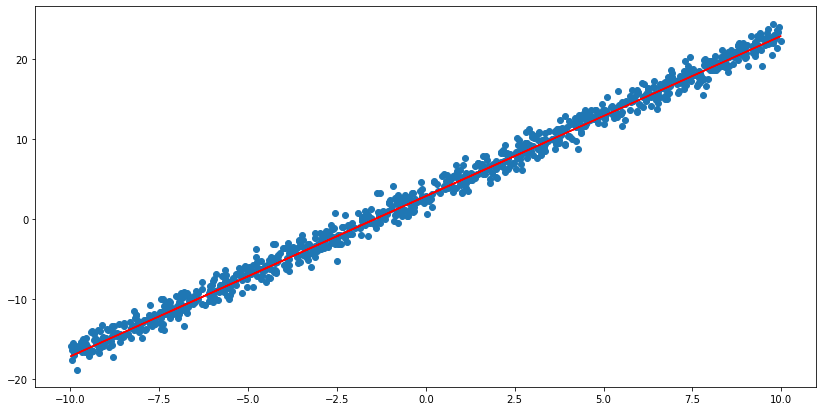

In [259]:
plt.figure(figsize = (14, 7))
plt.scatter(x, y_noise)
plt.plot(x, x*ls_param[0].item()+ls_param[1].item(), color="red" )

In [265]:
optimizer.dd

defaultdict(dict,
            {Parameter containing:
             tensor([[2.0029]], requires_grad=True): {'momentum_buffer': tensor([[-0.0099]])},
             Parameter containing:
             tensor([2.8114], requires_grad=True): {'momentum_buffer': tensor([-0.1500])}})